In [1]:
#Libraries goes Here>>>

import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Data is loaded Here>>>

cab_rides = pd.read_csv("cab_rides.csv")

In [3]:
#Print Data and shape

print(cab_rides.head())
print("Cab_rides Shape",cab_rides.shape)

   distance cab_type     time_stamp    destination            source  price  \
0      0.44     Lyft  1544952607890  North Station  Haymarket Square    5.0   
1      0.44     Lyft  1543284023677  North Station  Haymarket Square   11.0   
2      0.44     Lyft  1543366822198  North Station  Haymarket Square    7.0   
3      0.44     Lyft  1543553582749  North Station  Haymarket Square   26.0   
4      0.44     Lyft  1543463360223  North Station  Haymarket Square    9.0   

   surge_multiplier                                    id    product_id  \
0               1.0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7     lyft_line   
1               1.0  4bd23055-6827-41c6-b23b-3c491f24e74d  lyft_premier   
2               1.0  981a3613-77af-4620-a42a-0c0866077d1e          lyft   
3               1.0  c2d88af2-d278-4bfd-a8d0-29ca77cc5512   lyft_luxsuv   
4               1.0  e0126e1f-8ca9-4f2e-82b3-50505a09db9a     lyft_plus   

           name  
0        Shared  
1           Lux  
2          Lyft  
3 

In [4]:
#converting the source, destination, names of cabs to lower case
cab_rides["source"] = cab_rides["source"].str.lower()
cab_rides["destination"] = cab_rides["destination"].str.lower()
cab_rides["name"] = cab_rides["name"].str.lower()

In [5]:
#separating the lyft and uber rides
lyft  = cab_rides[cab_rides['cab_type']== 'Lyft'] 
uber  = cab_rides[cab_rides['cab_type']== 'Uber']

In [6]:
print(lyft.info())
print("\n")
print(uber.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307408 entries, 0 to 693053
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          307408 non-null  float64
 1   cab_type          307408 non-null  object 
 2   time_stamp        307408 non-null  int64  
 3   destination       307408 non-null  object 
 4   source            307408 non-null  object 
 5   price             307408 non-null  float64
 6   surge_multiplier  307408 non-null  float64
 7   id                307408 non-null  object 
 8   product_id        307408 non-null  object 
 9   name              307408 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 25.8+ MB
None


<class 'pandas.core.frame.DataFrame'>
Int64Index: 385663 entries, 12 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          385663 non-n

In [7]:
uber = uber.dropna(how="any")
print('After removing the nulls',uber.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330568 entries, 12 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          330568 non-null  float64
 1   cab_type          330568 non-null  object 
 2   time_stamp        330568 non-null  int64  
 3   destination       330568 non-null  object 
 4   source            330568 non-null  object 
 5   price             330568 non-null  float64
 6   surge_multiplier  330568 non-null  float64
 7   id                330568 non-null  object 
 8   product_id        330568 non-null  object 
 9   name              330568 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 27.7+ MB
After removing the nulls None


#Exploratory Data Analysis

In [8]:
#Correlation Matrix for Cab Rides Data

cab_rides.corr().style.background_gradient(cmap='coolwarm')

#It can be observed that the price and disctance are correlated and also the price and surge_multiplier have some correlation

,distance,time_stamp,price,surge_multiplier
distance,1.000000,0.003553,0.345061,0.024769
time_stamp,0.003553,1.000000,0.000808,0.000572
price,0.345061,0.000808,1.000000,0.240458
surge_multiplier,0.024769,0.000572,0.240458,1.000000


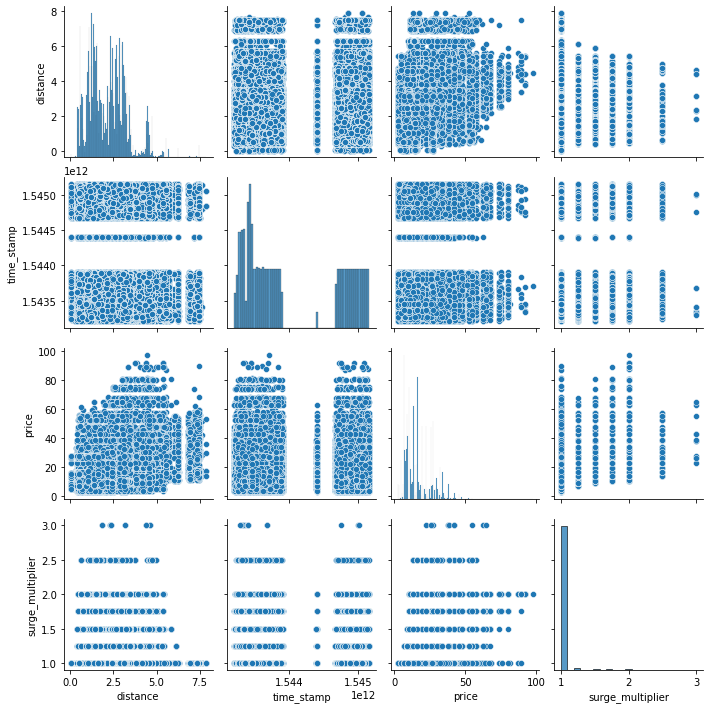

In [11]:
import seaborn as sns

sns.pairplot(cab_rides)

In [12]:
#These are the total count of different types of cabs in lyft
lyft.name.value_counts()

lux black       51235
lyft xl         51235
lyft            51235
lux             51235
lux black xl    51235
shared          51233
Name: name, dtype: int64

In [13]:
#These are the total count of different types of cabs in uber
uber.name.value_counts()

black suv    55096
wav          55096
uberxl       55096
black        55095
uberx        55094
uberpool     55091
Name: name, dtype: int64

The Distribution of the Lyft data is same


/home/students/saivuppa/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='name', ylabel='count'>

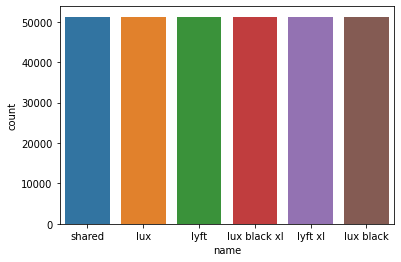

In [14]:
# It explains us that the data inclueds different types of rides in lyft are in an equal amount
print("The Distribution of the Lyft data is same")
sns.countplot(lyft["name"])

<AxesSubplot:xlabel='name', ylabel='count'>

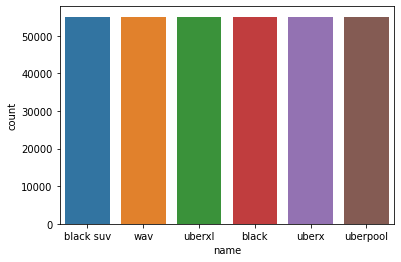

In [15]:
# It explains us that the data includes different types of rides in uber are in an equal amount
# sns.countplot(uber["name"])
sns.countplot(data=uber, x='name', order=uber.name.value_counts().index)

In [16]:
# surge multiplier is also a factor that decides the price so let's see how many unique surge multipliers are there
lyft["surge_multiplier"].unique()

array([1.  , 1.25, 2.5 , 2.  , 1.75, 1.5 , 3.  ])

/home/students/saivuppa/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='surge_multiplier', ylabel='count'>

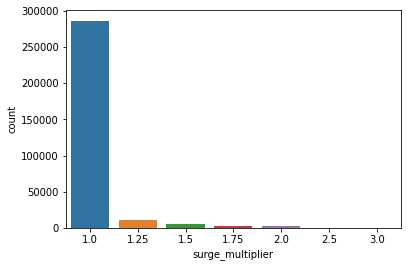

In [17]:
sns.countplot(lyft["surge_multiplier"])

In [18]:
# uber has only one surge multiplier i.e 1
uber["surge_multiplier"].unique()

array([1.])

In [19]:
# This gives us the list of source and destinations of lyft and uber cab services
from pprint import pprint
pprint(f'List of Lyft Sources are>>{lyft.source.unique()}\n\n List of Lyft Destinations are>> {lyft.destination.unique()}' )
pprint("=================================================================================================================")
pprint(f'List of Uber Sources are>>{uber.source.unique()}\n\n List of Uber Destinations are>> {uber.destination.unique()}' )

("List of Lyft Sources are>>['haymarket square' 'back bay' 'north station' "
 "'fenway' 'theatre district'\n"
 " 'beacon hill' 'financial district' 'north end' 'northeastern university'\n"
 " 'boston university' 'west end' 'south station']\n"
 '\n'
 " List of Lyft Destinations are>> ['north station' 'northeastern university' "
 "'haymarket square'\n"
 " 'south station' 'west end' 'theatre district' 'beacon hill' 'fenway'\n"
 " 'north end' 'back bay' 'boston university' 'financial district']")
'================================================================================================================='
("List of Uber Sources are>>['north end' 'beacon hill' 'north station' 'boston "
 "university'\n"
 " 'south station' 'fenway' 'theatre district' 'west end' 'back bay'\n"
 " 'northeastern university' 'haymarket square' 'financial district']\n"
 '\n'
 " List of Uber Destinations are>> ['west end' 'south station' 'fenway' "
 "'beacon hill' 'north station'\n"
 " 'back bay' 'north end' 'n

<AxesSubplot:xlabel='distance', ylabel='price'>

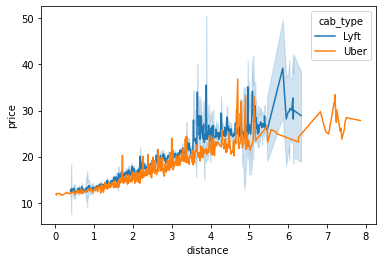

In [20]:
#This shows us that there is an increase in price as distance increases, and lyft prices are a bit higher compared to uber
sns.lineplot(x=cab_rides["distance"],y=cab_rides["price"],hue=cab_rides["cab_type"])

### Preparing data for vectors Source and Destination

In [21]:
#Reading Data into a dataframe

loc_index = {
'financial district' : 0,
'northeastern university': 1,
'north end': 2,
'boston university': 3,
 "north station" : 4,
 "back bay": 5,
 "theatre district" : 6,
 "south station": 7,
 "fenway" : 8,
 "haymarket square": 9,
 "west end" : 10,
 "beacon hill":11
}

# Reading the data and Assigning Source and Destination with a common Index
src_dst_idx = pd.DataFrame(cab_rides,columns = ['destination','source'])
src_dst_idx = src_dst_idx.applymap(lambda s: loc_index.get(s) if s in loc_index else s)
#src_dst_idx.head()

# Renaming the columns Destination and Source to destination_idx and source_idx
src_dst_idx = src_dst_idx.rename(columns= {'destination': 'destination_idx', 'source':'source_idx'})

# Merge the cab_rides with src_dst_idx
merge_df = pd.concat([cab_rides, src_dst_idx], axis=1, sort=True)
merge_df.head(2)

#type(merge_df)
#merge_df.to_csv(index=False)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,destination_idx,source_idx
0,0.44,Lyft,1544952607890,north station,haymarket square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,shared,4,9
1,0.44,Lyft,1543284023677,north station,haymarket square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,lux,4,9


### Loading the Relevant SPARK Libraries

In [20]:
# import necesaary libraries


!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.mirror.amaze.com.au/spark/spark-3.0.1/spark-3.0.1-bin-hadoop3.2.tgz
!tar xf spark-3.0.1-bin-hadoop3.2.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "spark-3.0.1-bin-hadoop3.2"

import findspark
findspark.init()


In [23]:
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName('spark-basic').setMaster('local')
sc = SparkContext.getOrCreate(SparkConf().setMaster('local[*]'))

In [24]:
from pyspark.sql.session import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql.functions import *
from pyspark.sql.types import *
import matplotlib.pyplot as plt
import numpy as np
import datetime

spark = SparkSession(sc)

from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.regression import *
from pyspark.ml.feature import OneHotEncoder

### Load the Data to RDD

In [25]:
spark_df = spark.createDataFrame(merge_df)
spark_df.printSchema()

root
 |-- distance: double (nullable = true)
 |-- cab_type: string (nullable = true)
 |-- time_stamp: long (nullable = true)
 |-- destination: string (nullable = true)
 |-- source: string (nullable = true)
 |-- price: double (nullable = true)
 |-- surge_multiplier: double (nullable = true)
 |-- id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- destination_idx: long (nullable = true)
 |-- source_idx: long (nullable = true)



In [26]:
spark_df = spark_df.dropna(how="any")
spark_df.show(30)

+--------+--------+-------------+--------------------+----------------+-----+----------------+--------------------+--------------------+------------+---------------+----------+
|distance|cab_type|   time_stamp|         destination|          source|price|surge_multiplier|                  id|          product_id|        name|destination_idx|source_idx|
+--------+--------+-------------+--------------------+----------------+-----+----------------+--------------------+--------------------+------------+---------------+----------+
|    0.44|    Lyft|1544952607890|       north station|haymarket square|  5.0|             1.0|424553bb-7174-41e...|           lyft_line|      shared|              4|         9|
|    0.44|    Lyft|1543284023677|       north station|haymarket square| 11.0|             1.0|4bd23055-6827-41c...|        lyft_premier|         lux|              4|         9|
|    0.44|    Lyft|1543366822198|       north station|haymarket square|  7.0|             1.0|981a3613-77af-462...|

In [27]:
# we have same locations in both the source and destinations
print(spark_df.select("destination").distinct().show())
print(spark_df.select("source").distinct().show())

+--------------------+
|         destination|
+--------------------+
|              fenway|
|         beacon hill|
|  financial district|
|   boston university|
|           north end|
|            west end|
|       south station|
|northeastern univ...|
|            back bay|
|       north station|
|    theatre district|
|    haymarket square|
+--------------------+

None
+--------------------+
|              source|
+--------------------+
|              fenway|
|         beacon hill|
|  financial district|
|   boston university|
|           north end|
|            west end|
|       south station|
|northeastern univ...|
|            back bay|
|       north station|
|    theatre district|
|    haymarket square|
+--------------------+

None


# Uber

In [28]:
#separate the 'Uber' Data from merged data

uber_rdd = spark_df.filter(spark_df["cab_type"]== 'Uber')
print("Below is the Uber Schema:\n")
uber_rdd.printSchema()

Below is the Uber Schema:

root
 |-- distance: double (nullable = true)
 |-- cab_type: string (nullable = true)
 |-- time_stamp: long (nullable = true)
 |-- destination: string (nullable = true)
 |-- source: string (nullable = true)
 |-- price: double (nullable = true)
 |-- surge_multiplier: double (nullable = true)
 |-- id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- destination_idx: long (nullable = true)
 |-- source_idx: long (nullable = true)



In [29]:
#Dropping NA
print("Removing the NULL's if any in UBER Data!")
uber_rdd = uber_rdd.dropna(how="any")
uber_rdd.show(10)

Removing the NULL's if any in UBER Data!
+--------+--------+-------------+-------------+-----------+-----+----------------+--------------------+--------------------+---------+---------------+----------+
|distance|cab_type|   time_stamp|  destination|     source|price|surge_multiplier|                  id|          product_id|     name|destination_idx|source_idx|
+--------+--------+-------------+-------------+-----------+-----+----------------+--------------------+--------------------+---------+---------------+----------+
|    1.11|    Uber|1543615981179|     west end|  north end| 12.0|             1.0|009e9c53-074d-43c...|6f72dfc5-27f1-42e...|   uberxl|             10|         2|
|    1.11|    Uber|1544698211014|     west end|  north end| 16.0|             1.0|23f145da-f0c1-4d1...|6c84fd89-3f11-478...|    black|             10|         2|
|    1.11|    Uber|1544728503935|     west end|  north end|  7.5|             1.0|357559cb-8c58-427...|55c66225-fbe7-4fd...|    uberx|             10

* From the above mentioned columns, the price will have an effect based on distance, source, destination, surge_multiplier, name
* Now let's tranform the inputs to required format so that prediction of price for uber cabs is done.
* Since the distance and surge_multiplier are already in number format, no transformation is required

In [30]:
#It can be observed that the "name" column is categorical with multiple categories. 

indexer1 = StringIndexer(inputCol="name", outputCol="name_indexed")
uber_rdd_model = indexer1.fit(uber_rdd)
uber_rdd = uber_rdd_model.transform(uber_rdd)

uber_rdd.show(5)

+--------+--------+-------------+-----------+---------+-----+----------------+--------------------+--------------------+---------+---------------+----------+------------+
|distance|cab_type|   time_stamp|destination|   source|price|surge_multiplier|                  id|          product_id|     name|destination_idx|source_idx|name_indexed|
+--------+--------+-------------+-----------+---------+-----+----------------+--------------------+--------------------+---------+---------------+----------+------------+
|    1.11|    Uber|1543615981179|   west end|north end| 12.0|             1.0|009e9c53-074d-43c...|6f72dfc5-27f1-42e...|   uberxl|             10|         2|         1.0|
|    1.11|    Uber|1544698211014|   west end|north end| 16.0|             1.0|23f145da-f0c1-4d1...|6c84fd89-3f11-478...|    black|             10|         2|         3.0|
|    1.11|    Uber|1544728503935|   west end|north end|  7.5|             1.0|357559cb-8c58-427...|55c66225-fbe7-4fd...|    uberx|             10

In [31]:
# From the complete Dataset we are selecting the required features and Label

uber_rdd = uber_rdd.selectExpr("distance","surge_multiplier","source_idx","destination_idx", "name_indexed", "price")
uber_rdd.show(5)

+--------+----------------+----------+---------------+------------+-----+
|distance|surge_multiplier|source_idx|destination_idx|name_indexed|price|
+--------+----------------+----------+---------------+------------+-----+
|    1.11|             1.0|         2|             10|         1.0| 12.0|
|    1.11|             1.0|         2|             10|         3.0| 16.0|
|    1.11|             1.0|         2|             10|         4.0|  7.5|
|    1.11|             1.0|         2|             10|         2.0|  7.5|
|    1.11|             1.0|         2|             10|         0.0| 26.0|
+--------+----------------+----------+---------------+------------+-----+
only showing top 5 rows



In [32]:
# Now we build a linear regression model to predict Price from the features we have created
feature_cols = ["distance","surge_multiplier","source_idx","destination_idx", "name_indexed"]
label_col = 'price'

# vector assembler to build a dense vector and we create Uber Dataset
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')

# Reduce dataframe to essential columns for model building
uber_red_form = assembler.transform(uber_rdd.select(feature_cols + [label_col]))
uber_red_form.printSchema()

root
 |-- distance: double (nullable = true)
 |-- surge_multiplier: double (nullable = true)
 |-- source_idx: long (nullable = true)
 |-- destination_idx: long (nullable = true)
 |-- name_indexed: double (nullable = false)
 |-- price: double (nullable = true)
 |-- features: vector (nullable = true)



In [33]:
from pyspark.ml.evaluation import RegressionEvaluator

# Random Forest Regression

In [34]:
uber_red_form.show()

+--------+----------------+----------+---------------+------------+-----+--------------------+
|distance|surge_multiplier|source_idx|destination_idx|name_indexed|price|            features|
+--------+----------------+----------+---------------+------------+-----+--------------------+
|    1.11|             1.0|         2|             10|         1.0| 12.0|[1.11,1.0,2.0,10....|
|    1.11|             1.0|         2|             10|         3.0| 16.0|[1.11,1.0,2.0,10....|
|    1.11|             1.0|         2|             10|         4.0|  7.5|[1.11,1.0,2.0,10....|
|    1.11|             1.0|         2|             10|         2.0|  7.5|[1.11,1.0,2.0,10....|
|    1.11|             1.0|         2|             10|         0.0| 26.0|[1.11,1.0,2.0,10....|
|    1.11|             1.0|         2|             10|         5.0|  5.5|[1.11,1.0,2.0,10....|
|    2.48|             1.0|        11|              7|         2.0|  8.5|[2.48,1.0,11.0,7....|
|    2.48|             1.0|        11|            

In [35]:
# Since we require features and label, so we did below:

df = uber_red_form.withColumnRenamed('price', 'label').select("label","features")
df

DataFrame[label: double, features: vector]

In [36]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer

featureIndexer = VectorIndexer(inputCol="features", outputCol="indexedFeatures").fit(df)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = df.randomSplit([0.7, 0.3])


#Description of the Training Data
print("Below is the description of the Uber training Dataset after splitting")
trainingData.describe().show()
print("\n")
print("Below is the description of the Uber Test Dataset after splitting")
testData.describe().show()


# Train a RandomForest model.
rf = RandomForestRegressor(featuresCol="indexedFeatures")

# Chain indexer and forest in a Pipeline
pipeline = Pipeline(stages=[featureIndexer, rf])

# Train model.  This also runs the indexer.
model_uber = pipeline.fit(trainingData)

# Make predictions.
predictions = model_uber.transform(testData)

# Select example rows to display.
predictions.select("prediction", "label", "features").show(5)


Below is the description of the Uber training Dataset after splitting
+-------+------------------+
|summary|             label|
+-------+------------------+
|  count|            231343|
|   mean|15.802712854938338|
| stddev|  8.56175308765898|
|    min|               4.5|
|    max|              89.5|
+-------+------------------+



Below is the description of the Uber Test Dataset after splitting
+-------+------------------+
|summary|             label|
+-------+------------------+
|  count|             99225|
|   mean|15.778160745779793|
| stddev| 8.556929592158125|
|    min|               4.5|
|    max|              87.0|
+-------+------------------+

+-----------------+-----+--------------------+
|       prediction|label|            features|
+-----------------+-----+--------------------+
|8.255505675699792|  4.5|[0.54,1.0,7.0,0.0...|
|8.255505675699792|  4.5|[0.54,1.0,7.0,0.0...|
|8.255505675699792|  4.5|[0.54,1.0,7.0,0.0...|
|8.255505675699792|  4.5|[0.54,1.0,7.0,0.0...|
|8.255505

In [37]:
# Select (prediction, true label) and compute test error
rmse = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = rmse.evaluate(predictions)
print("rmse:", rmse)

r_2 = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="r2")
r_2 = r_2.evaluate(predictions)
print("r2:", r_2)


mse = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="mse")
mse = mse.evaluate(predictions)
print("mse:", mse)

mae = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="mae")
mae = mae.evaluate(predictions)
print("mae:", mae)


rfModel = model_uber.stages[1]
print(rfModel)  # summary only



rmse: 2.4596409643969355
r2: 0.9173749196817758
mse: 6.049833673739486
mae: 1.7180743254155144
RandomForestRegressionModel: uid=RandomForestRegressor_91174f0f020a, numTrees=20, numFeatures=5


# Lyft

In [38]:
lyft_rdd = spark_df.filter(spark_df["cab_type"]== 'Lyft')
print("Below is the Lyft Schema:\n")
lyft_rdd.printSchema()

Below is the Lyft Schema:

root
 |-- distance: double (nullable = true)
 |-- cab_type: string (nullable = true)
 |-- time_stamp: long (nullable = true)
 |-- destination: string (nullable = true)
 |-- source: string (nullable = true)
 |-- price: double (nullable = true)
 |-- surge_multiplier: double (nullable = true)
 |-- id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- destination_idx: long (nullable = true)
 |-- source_idx: long (nullable = true)



In [39]:
#Removing NA if any
lyft_rdd = lyft_rdd.dropna(how="any")
lyft_rdd.show(10)

+--------+--------+-------------+--------------------+----------------+-----+----------------+--------------------+------------+------------+---------------+----------+
|distance|cab_type|   time_stamp|         destination|          source|price|surge_multiplier|                  id|  product_id|        name|destination_idx|source_idx|
+--------+--------+-------------+--------------------+----------------+-----+----------------+--------------------+------------+------------+---------------+----------+
|    0.44|    Lyft|1544952607890|       north station|haymarket square|  5.0|             1.0|424553bb-7174-41e...|   lyft_line|      shared|              4|         9|
|    0.44|    Lyft|1543284023677|       north station|haymarket square| 11.0|             1.0|4bd23055-6827-41c...|lyft_premier|         lux|              4|         9|
|    0.44|    Lyft|1543366822198|       north station|haymarket square|  7.0|             1.0|981a3613-77af-462...|        lyft|        lyft|              

In [40]:
#It can be observed that the "name" column is categorical with multiple categories. 

indexer4 = StringIndexer(inputCol="name", outputCol="name_indexed")
lyft_rdd_model = indexer4.fit(lyft_rdd)
lyft_rdd = lyft_rdd_model.transform(lyft_rdd)

lyft_rdd.show()

+--------+--------+-------------+--------------------+----------------+-----+----------------+--------------------+------------+------------+---------------+----------+------------+
|distance|cab_type|   time_stamp|         destination|          source|price|surge_multiplier|                  id|  product_id|        name|destination_idx|source_idx|name_indexed|
+--------+--------+-------------+--------------------+----------------+-----+----------------+--------------------+------------+------------+---------------+----------+------------+
|    0.44|    Lyft|1544952607890|       north station|haymarket square|  5.0|             1.0|424553bb-7174-41e...|   lyft_line|      shared|              4|         9|         5.0|
|    0.44|    Lyft|1543284023677|       north station|haymarket square| 11.0|             1.0|4bd23055-6827-41c...|lyft_premier|         lux|              4|         9|         0.0|
|    0.44|    Lyft|1543366822198|       north station|haymarket square|  7.0|             

In [41]:
lyft_rdd = lyft_rdd.selectExpr("distance","surge_multiplier","source_idx","destination_idx", "name_indexed", "price")

# now we build a linear regression model to predict Price from the features we have created
feature_cols = ["distance","surge_multiplier","source_idx","destination_idx", "name_indexed"]
label_col = 'price'

# vector assembler to build a dense vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')

# Reduce dataframe to essential columns for model building
lyft_red_form = assembler.transform(lyft_rdd.select(feature_cols + [label_col]))
lyft_red_form.printSchema()

root
 |-- distance: double (nullable = true)
 |-- surge_multiplier: double (nullable = true)
 |-- source_idx: long (nullable = true)
 |-- destination_idx: long (nullable = true)
 |-- name_indexed: double (nullable = false)
 |-- price: double (nullable = true)
 |-- features: vector (nullable = true)



In [42]:
df1 = lyft_red_form.withColumnRenamed('price', 'label').select("label","features")
df1

DataFrame[label: double, features: vector]

In [43]:
featureIndexer = VectorIndexer(inputCol="features", outputCol="indexedFeatures").fit(df1)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = df1.randomSplit([0.7, 0.3])

#Description of the Training Data
print("Below is the description of the Lyft training Dataset after splitting")
trainingData.describe().show()
print("\n")
print("Below is the description of the Lyft Test Dataset after splitting")
testData.describe().show()

# Train a RandomForest model.
rf = RandomForestRegressor(featuresCol="indexedFeatures")

# Chain indexer and forest in a Pipeline
pipeline = Pipeline(stages=[featureIndexer, rf])

# Train model.  This also runs the indexer.
model_lyft = pipeline.fit(trainingData)

# Make predictions.
predictions = model_lyft.transform(testData)

# Select example rows to display.
predictions.select("prediction", "label", "features").show(5)

Below is the description of the Lyft training Dataset after splitting
+-------+------------------+
|summary|             label|
+-------+------------------+
|  count|            215308|
|   mean|17.346654931539938|
| stddev|10.022546974887025|
|    min|               2.5|
|    max|              97.5|
+-------+------------------+



Below is the description of the Lyft Test Dataset after splitting
+-------+------------------+
|summary|             label|
+-------+------------------+
|  count|             92100|
|   mean|17.362479913137893|
| stddev|10.011319159574619|
|    min|               2.5|
|    max|              92.0|
+-------+------------------+

+-----------------+-----+--------------------+
|       prediction|label|            features|
+-----------------+-----+--------------------+
|6.165850147856764|  2.5|[0.57,1.0,7.0,0.0...|
|6.383878626795047|  2.5|[0.72,1.0,9.0,10....|
|7.279733277872381|  2.5|[1.24,1.0,0.0,2.0...|
|7.279733277872381|  2.5|[1.26,1.0,0.0,2.0...|
|6.774621

In [44]:
# Select (prediction, true label) and compute test error
rmse = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = rmse.evaluate(predictions)
print("rmse:", rmse)

r_2 = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="r2")
r_2 = r_2.evaluate(predictions)
print("r2:", r_2)


mse = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="mse")
mse = mse.evaluate(predictions)
print("mse:", mse)

mae = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="mae")
mae = mae.evaluate(predictions)
print("mae:", mae)

rfModel = model_lyft.stages[1]
print(rfModel)  # summary only

rmse: 2.7224559862685056
r2: 0.9260490365671241
mse: 7.411766597169221
mae: 2.0183231499296514
RandomForestRegressionModel: uid=RandomForestRegressor_5daefeb43910, numTrees=20, numFeatures=5


# Comparison between Lyft and Uber

In [45]:
print("The different locations where the cab rides are available:\n", loc_index.keys())

The different locations where the cab rides are available:
 dict_keys(['financial district', 'northeastern university', 'north end', 'boston university', 'north station', 'back bay', 'theatre district', 'south station', 'fenway', 'haymarket square', 'west end', 'beacon hill'])


In [46]:
#since an index is given to each name in both uber and lyft, inorder to convert our test input name to same index as our model we need IndextoString function.
from pyspark.ml.feature import IndexToString
converter1 = IndexToString(inputCol="name_indexed", outputCol="name")
converted1 = converter1.transform(uber_rdd)
#converted1.select("name_indexed", "name").distinct().show()

converter2 = IndexToString(inputCol="name_indexed", outputCol="name")
converted2 = converter2.transform(lyft_rdd)
#converted2.select("name_indexed", "name").distinct().show()

In [47]:
uber_name_idx = converted1.select("name_indexed", "name").distinct().toPandas()
lyft_name_idx = converted2.select("name_indexed", "name").distinct().toPandas()

print("The type of cabs provided by uber are,",uber_name_idx["name"].values)
print("The type of cabs provided by lyft are,",lyft_name_idx["name"].values)

The type of cabs provided by uber are, ['uberpool' 'black suv' 'uberxl' 'uberx' 'black' 'wav']
The type of cabs provided by lyft are, ['shared' 'lux black' 'lux' 'lyft xl' 'lyft' 'lux black xl']


In [48]:
inputs_uber = {"distance": 4,
               "surge_multiplier": 1,
            "source": "north station",
          "destination": "financial district",
          "name": "uberxl"}
inputs_lyft = {"distance": 4,
            "surge_multiplier": 1,
            "source": "north station",
          "destination": "financial district",
          "name": "lyft xl"}

In [49]:
#assigning index to source, destination, and name for both lyft and uber inputs based on loc_index
inputs_uber["source_idx"] = loc_index[inputs_uber["source"]]
inputs_uber["destination_idx"] = loc_index[inputs_uber["destination"]]
inputs_uber["name_indexed"] = uber_name_idx[uber_name_idx["name"] == inputs_uber["name"]]["name_indexed"]
 
inputs_lyft["source_idx"] = loc_index[inputs_lyft["source"]]
inputs_lyft["destination_idx"] = loc_index[inputs_lyft["destination"]]
inputs_lyft["name_indexed"] = lyft_name_idx[lyft_name_idx["name"] == inputs_lyft["name"]]["name_indexed"]

uber_input_df = pd.DataFrame(inputs_uber)
lyft_input_df = pd.DataFrame(inputs_lyft)

In [50]:
uber_rdd_feat = spark.createDataFrame(uber_input_df)
lyft_rdd_feat = spark.createDataFrame(lyft_input_df)

# Reduce dataframe to essential columns for model building
uber_feat = assembler.transform(uber_rdd_feat.select(feature_cols)).select("features")
lyft_feat = assembler.transform(lyft_rdd_feat.select(feature_cols)).select("features")

In [54]:
# Make uber prediction.
uber_prediction = model_uber.transform(uber_feat)
print("The price predicted for uber for the given input features is\n")
uber_prediction.select("prediction").show()

# Make lyft predictions.
lyft_prediction = model_lyft.transform(lyft_feat)
print("The price predicted for lyft for the given input features is\n")
lyft_prediction.select("prediction").show()

#Lets See which is Better
if uber_prediction.select("prediction").collect() > lyft_prediction.select("prediction").collect():
    print("Congratulation!! \n*Lyft* offers better price in this situation")
else:
    print("Congratulation!! \n*Uber* offers better price in this situation")



The price predicted for uber for the given input features is

+-----------------+
|       prediction|
+-----------------+
|17.56005696375568|
+-----------------+

The price predicted for lyft for the given input features is

+-----------------+
|       prediction|
+-----------------+
|19.61007076717517|
+-----------------+

Congratulation!! 
*Uber* offers better price in this situation
